<img src="http://www.kurzweilai.net/images/poisoning_attack_svm.png" />

Extracting input/data\train-images-idx3-ubyte.gz
Extracting input/data\train-labels-idx1-ubyte.gz
Extracting input/data\t10k-images-idx3-ubyte.gz
Extracting input/data\t10k-labels-idx1-ubyte.gz


D:\Usuarios\rhaps\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


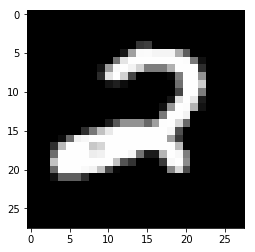

In [12]:
import random as rand
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib.pyplot import cm
mnist = input_data.read_data_sets('input/data', one_hot=True)

mutation_degree = 0.5                              # Mutation probability
mutation_number = int(mutation_degree * 784)              # Number of elements to mutate
mutation_range = range(784)                        # Used to select mutation and crossover points
crossover_probability = 0.6                           # Crossover probability
population_number = 50                           # Population size
population_range = range(population_number)
generation_number = 1000                         # Number of generations
generation_range = range(generation_number)
tournaments = 3                            # Tournament sizes
guassian_value = 0.007                         # Determines magnitude of mutations (guassian standard deviation)
fitness_sensativity = 0.0000005

sess = tf.InteractiveSession()


# Note: the following are placeholders for a tensor that will be constantly fed
x = tf.placeholder(tf.float32, shape=[None, 784])   # Feature tensor = 28x28

W = tf.Variable(tf.zeros([784, 10]))                # Weights
b = tf.Variable(tf.zeros([10]))                     # Biases

sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()

batch = mnist.test.next_batch(1)
batch = mnist.test.next_batch(1)
two = batch[0]                                      # two is our test image
population = np.zeros((population_number, 784))
for i in population_range:                              # Seeding the initial image population as the target image (two)
    population[i] = two

test = population[1]                                # Test sample from population

# Print the image
test.shape = (28, 28)
plt.imshow(test, cmap='gray')
plt.savefig("output/fig4.png")

Model out: [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Actual: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
result duplicate: [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
0
<built-in method astype of numpy.ndarray object at 0x000001D504ADFC10>
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
result duplicate: [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
New:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


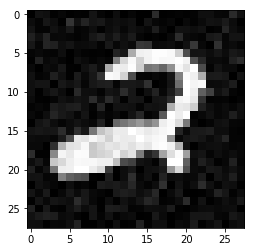

In [13]:
children = np.zeros((population_number, 784))            # Empty child population


# Mutation function (with some probability, each pixel mutates in an amount given by guassian distribution)
def generate_mutation(chromosome):
    change_list = rand.sample(mutation_range, mutation_number)

    for i in change_list:
        chromosome[i] += np.random.normal(scale=guassian_value)    # The results are somewhat sensitive to how
                                                                # the gaussian is scaled
    chromosome[chromosome < 0] = 0
    chromosome[chromosome > 1] = 1

    return chromosome


def crossover(chromosome1, chromosome2):
    crossover_points = rand.sample(mutation_range, 2)

    temp = chromosome2[crossover_points[0]:crossover_points[1]]
    chromosome2[crossover_points[0]:crossover_points[1]] = chromosome1[crossover_points[0]:crossover_points[1]]
    chromosome1[crossover_points[0]:crossover_points[1]] = temp

    return chromosome1, chromosome2


def tournament(images, target_image, scores, target_score, step):
    fitness_value = np.zeros(tournaments)
    for i in range(tournaments):
        fitness_value[i] = fitness(images[i], target_image, scores[i], target_score, step)

    winner = images[np.argmax(fitness_value)]

    return winner


# Fitness function
def fitness(image, target_image, score, target_score, step):
    fitness_value = -(fitness_sensativity * np.linalg.norm(image - target_image) + (target_score-score))

    return fitness_value


y = tf.nn.softmax(tf.matmul(x, W) + b)

# Restore variables
#saver.restore(sess, 'fashion_model/fashion_model.ckpt')

# Prints the initial classification
result = sess.run(y, feed_dict={x: batch[0]})
print("Model out:", result)
print("Actual:", batch[1])
two.shape = (784)

# Main algorithm
for i in generation_range:
    scores = sess.run(y, feed_dict={x: population})

    for j in range(population_number//2):
        selection = rand.sample(population_range, tournaments)
        parent1 = tournament([population[selection[0]], population[selection[1]], population[selection[2]]], two,
                             [scores[selection[0], 6], scores[selection[1], 6], scores[selection[2], 6]], 1, i)
        selection = rand.sample(population_range, tournaments)
        parent2 = tournament([population[selection[0]], population[selection[1]], population[selection[2]]], two,
                             [scores[selection[0], 6], scores[selection[1], 6], scores[selection[2], 6]], 1, i)

        if np.random.rand() < crossover_probability:
            child1, child2 = crossover(parent1, parent2)
            children[j*2] = generate_mutation(child1)
            children[j*2+1] = generate_mutation(child2)
        else:
            children[j*2] = generate_mutation(parent1)
            children[j*2+1] = generate_mutation(parent2)

    population = children


test = population[1]
test.shape = (1, 784)
result = sess.run(y, feed_dict={x: test})
result_duplicate=result
print("result duplicate:",result_duplicate)
i_max=np.argmax(result)
print(i_max)            #finding the max probability
print(result.astype)
print(result.flatten())#flttening the numpy array from nd to 1D
result_list = result.flatten()  #saving array in another list
for j in range(len(result_list)):
    if result_list[i_max]==result_list[j]:
        result_list[j]=1
    else:
        result_list[j]=0        #making other prediction=0 for clearer results
print("result duplicate:",result_duplicate)
print ("New: ", result_list)

test.shape = (28, 28)
plt.imshow(test, cmap='gray')
plt.savefig("output/fig4.png")

In [15]:
test.shape

(28, 28)

## References

+ https://github.com/prabhant/Genetic-adversarial-examples/blob/master/Fashionmnist.py